In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [148]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['axes.grid'] = True

plt.style.use('seaborn-v0_8-darkgrid')
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8')

In [149]:
data = {
    "X_Value": [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
        11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30
    ],
    "Y_Value": [
        15, 18, 25, 35, 50, 68, 90, 115, 145, 180,
        220, 265, 315, 370, 430, 495, 565, 640, 720, 805,
        895, 990, 1090, 1195, 1305, 1420, 1540, 1665, 1795, 1930
    ]
}

df = pd.DataFrame(data)

In [150]:
df

,X_Value,Y_Value
0,1,15
1,2,18
2,3,25
3,4,35
4,5,50
5,6,68
6,7,90
7,8,115
8,9,145
9,10,180


In [151]:
x = df[['X_Value']]
y = df['Y_Value']

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [154]:
model = LinearRegression()

In [155]:
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


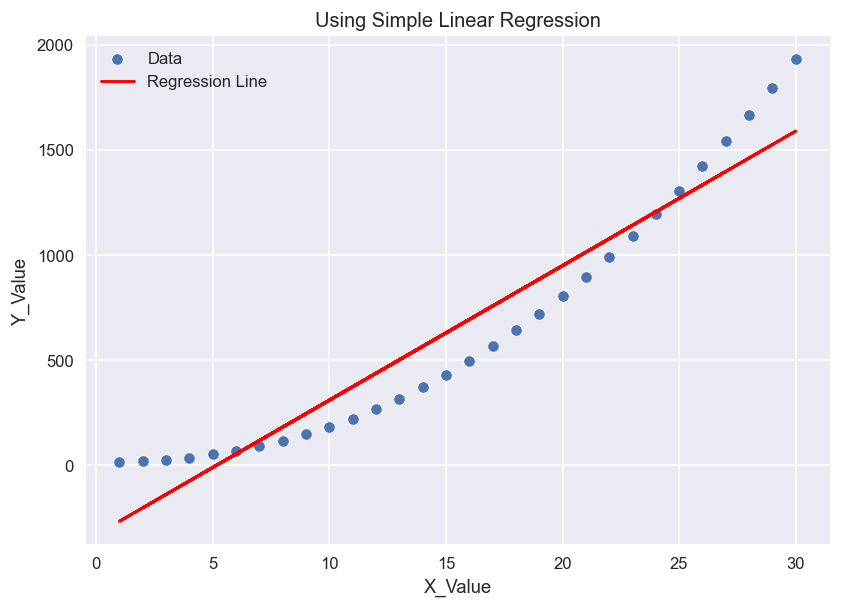

In [156]:
sns.scatterplot(x="X_Value", y="Y_Value", data=df, label="Data")
plt.plot(x_train,model.predict(x_train), color='red', label="Regression Line")
plt.title('Using Simple Linear Regression')
plt.legend()
plt.show()

In [157]:
r2 = r2_score(y_pred, y_test)

In [158]:
r2*100

99.9976076547246

In [159]:
poly = PolynomialFeatures(degree=2)

In [160]:
x_poly = poly.fit_transform(x_train)

In [161]:
x_poly

array([[  1.,  29., 841.],
       [  1.,  25., 625.],
       [  1.,  13., 169.],
       [  1.,   1.,   1.],
       [  1.,   5.,  25.],
       [  1.,  17., 289.],
       [  1.,   6.,  36.],
       [  1.,  14., 196.],
       [  1.,  12., 144.],
       [  1.,  23., 529.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,  26., 676.],
       [  1.,   4.,  16.],
       [  1.,  22., 484.],
       [  1.,  27., 729.],
       [  1.,  19., 361.],
       [  1.,  30., 900.],
       [  1.,  21., 441.],
       [  1.,   8.,  64.],
       [  1.,  11., 121.],
       [  1.,  15., 225.],
       [  1.,  20., 400.],
       [  1.,   7.,  49.]])

In [162]:
model = LinearRegression()

In [163]:
model.fit(x_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [164]:
x_test_poly = poly.fit_transform(x_test)

In [165]:
y_pred = model.predict(x_test_poly)

In [166]:
r2_score_poly = r2_score(y_test, y_pred)

In [169]:
r2_score_poly*100

99.99760154408442

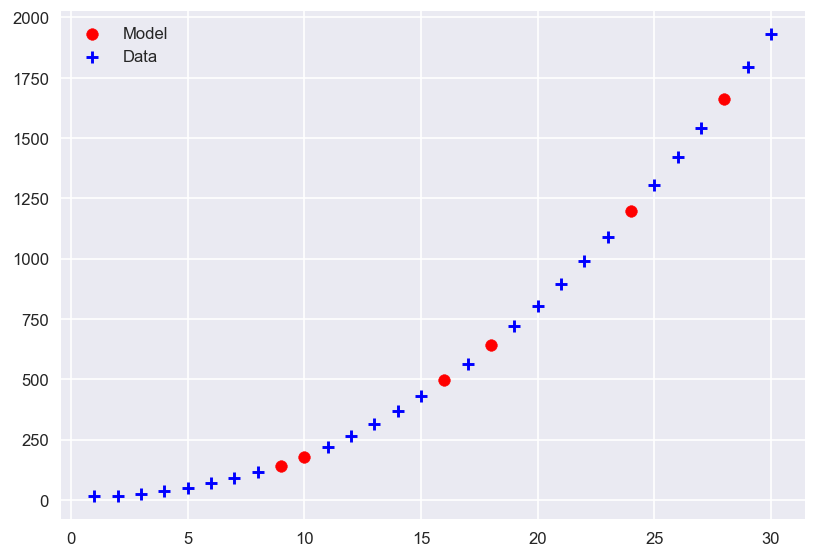

In [167]:
plt.scatter(x_test, y_pred, label="Model",color="red")
plt.scatter(x_train, y_train, label="Data",color="blue", marker="+")
plt.legend()
plt.show()